# Get the Image Details

In [1]:
import json
import os

result = []

for file_name in ["audi.json", "ambercrombie.json", "sephora.json"]:
    with open(file_name, 'r') as j:
        data = json.loads(j.read())
        
    for key in data:
        if key.startswith("jcr") or key.startswith("rep"):
            continue

        tags = []
        for tag in data[key]["jcr:content"]["metadata"]["predictedTags"]:
            if tag.startswith("jcr"):
                continue
            if data[key]["jcr:content"]["metadata"]["predictedTags"][tag]["confidence"] > 0.67:
                tags.append(tag)
        
        result.append({
            "image_name" : key,
            "tags" : tags
        })


# Write data into file 

with open('parsed_image_attr.json', 'w') as f:
    json.dump(result, f, indent=4)
    
print(json.dumps(result, indent=4))

[
    {
        "image_name": "256x144__0002_AA5_D_141018.jpg",
        "tags": [
            "abstract",
            "background"
        ]
    },
    {
        "image_name": "1300x551_aoz-a1-header_CheckeredFlag_V3.jpg",
        "tags": [
            "auto",
            "isolated",
            "vehicle",
            "automobile",
            "car",
            "transport",
            "transportation",
            "police"
        ]
    },
    {
        "image_name": "1920x728_A1_0E0E_C2K_GER.jpg",
        "tags": [
            "auto",
            "speed",
            "vehicle",
            "automobile",
            "car",
            "road",
            "wheel",
            "transportation",
            "fast",
            "drive"
        ]
    },
    {
        "image_name": "480x270_AA1_141007.jpg",
        "tags": [
            "auto",
            "vehicle",
            "automobile",
            "car",
            "road",
            "street",
            "transportation"
        

# Name Tokenizer

In [2]:
from dateutil import parser
import datetime as dt
import re
import json
import nltk
import os

# Download NLTK resources if not downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

class NameParser:

    ''' Constructor '''
    def __init__ (self, name, debug=False):
        self.name = name
        self.debug = debug

    ''' Extracts date '''
    def __extract_date(self):

        regex = [
            r'\d{4}-\d{2}-\d{2}',
            r'\d{4}/\d{2}/\d{2}',
            r'\d{2}-\d{2}-\d{4}',
            r'\d{2}/\d{2}/\d{4}',
            r'\d{4}.\d{2}-\d{2}',
            r'\d{2}.\d{2}.\d{4}',
        ]

        for r in regex:
            match = re.search(r, self.name)
            if match : 
                return match.group()

        # fmts = ('%b %d, %Y','%b %d, %Y','%B %d, %Y','%B %d %Y','%m/%d/%Y','%m/%d/%y','%m-%d-%Y','%m-%d-%y','%d/%m/%Y','%d/%m/%y','%d-%m-%Y','%d-%m-%y','%b %Y','%B%Y','%b %d,%Y')
        # for fmt in fmts:
        #     try:
        #         date = dt.datetime.strptime(self.name, fmt)
        #         if self.debug : print("Date: " + date)
        #         return date
        #     except ValueError as err:
        #         pass
        return ""

    ''' Extract resolutions '''
    def __extract_resolution(self):
        try:
            res = re.findall('\d{2,5}x\d{2,5}', self.name, flags=re.IGNORECASE)[0]
            if self.debug : print("Resultion : " + res)
            return res
        except:
            return ""

    ''' Tokenize and lemmetize the name '''
    def __extract_tokens(self, str):
        # tokens = re.compile(r'\W+').split(str)
        lemmatizer = WordNetLemmatizer()
        tokens = re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>?]', str)
        tokens = [lemmatizer.lemmatize(w) for w in tokens]
        tokens = [w for w in tokens if not w.lower() in set(stopwords.words('english'))]
        if self.debug : print("tokens : " + tokens)
        return tokens

    ''' Extract Tokens '''
    def __filter_name_tokens(self):
        
        filter_list = ["", "image", "photo"]
        tokens = self.__extract_tokens(os.path.splitext(self.name)[0])
        # tokens = [token for token in tokens if token not in self.__extract_tokens(self.__extract_date())]
        tokens = [token for token in tokens if token not in self.__extract_tokens(self.__extract_resolution())]
        tokens = [re.sub(r'[^a-zA-Z0-9]','', string) for string in tokens]
        tokens = [token for token in tokens if token.strip().lower() not in filter_list]
        tokens = [token for token in tokens if not token.isnumeric()]

        # Remove numbers in tokens
        # tokens = [re.sub('[0-9]', '', i) for i in tokens]

        if self.debug : print("Tokens: " + str(tokens))
        return tokens

    ''' Pretty Labels '''
    def get_labels_formatted(self):
        value = {
            "date" : self.__extract_date(),
            "resolution": self.__extract_resolution(),
            "tokens": self.__filter_name_tokens()
        }
        if self.debug : print(value)
        return value
         

# Write data to file 
# with open("parsed_image_attr.json", 'r') as j:
#     data = json.loads(j.read())
#     result = []
#     for image in data:
#         np = NameParser(image["image_name"])
#         name_labels = np.get_labels_formatted()
#         name_labels["tags"] = image["tags"]
#         result.append({
#             image["image_name"]: name_labels
#         })
    
#     print(json.dumps(result, indent=4))
#     with open('result.json', 'w') as f:
#         json.dump(result, f, indent=4)


# Driver

data = []
for image in result:
    np = NameParser(image["image_name"])
    name_labels = np.get_labels_formatted()
    name_labels["tags"] = image["tags"]
    name_labels["tags"] = name_labels["tags"] + name_labels["tokens"]
    data.append({
        image["image_name"]: name_labels
    })
    
print(json.dumps(data, indent=4))

[nltk_data] Downloading package punkt to /Users/gou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/gou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/gou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[
    {
        "256x144__0002_AA5_D_141018.jpg": {
            "date": "",
            "resolution": "256x144",
            "tokens": [
                "AA5"
            ],
            "tags": [
                "abstract",
                "background",
                "AA5"
            ]
        }
    },
    {
        "1300x551_aoz-a1-header_CheckeredFlag_V3.jpg": {
            "date": "",
            "resolution": "1300x551",
            "tokens": [
                "aoz",
                "a1",
                "header",
                "CheckeredFlag",
                "V3"
            ],
            "tags": [
                "auto",
                "isolated",
                "vehicle",
                "automobile",
                "car",
                "transport",
                "transportation",
                "police",
                "aoz",
                "a1",
                "header",
                "CheckeredFlag",
                "V3"
            ]
        }
    },
    {

# Vectorizing Textual Data

In [3]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [4]:
# Create synopses

synopses = []
image_names = []
vocab = []

for image_data in data:
    for image_name in image_data:
        synopses.append(" ".join(image_data[image_name]["tags"]))
        image_names.append(image_name)
        vocab.extend(image_data[image_name]["tags"])

print(synopses)

['abstract background AA5', 'auto isolated vehicle automobile car transport transportation police aoz a1 header CheckeredFlag V3', 'auto speed vehicle automobile car road wheel transportation fast drive A1 0E0E C2K GER', 'auto vehicle automobile car road street transportation AA1', 'auto speed vehicle automobile car road transportation AA1 SB', 'auto inside interior vehicle automobile car dashboard wheel transportation seat driving 0000s QA5 AP', 'auto inside interior vehicle automobile car dashboard wheel leather seat driving QA5 AP', 'radio button music car audio cd control AA5', 'auto inside speed interior vehicle automobile car dashboard wheel steering transportation driving speedometer AA5', 'auto interior vehicle automobile car dashboard wheel steering transportation driving driver drive AA5', 'auto isolated vehicle automobile white car design transport transportation luxury drive AA1', 'isolated apparel white garment sweater striped jacket clothes shirt background clothing fashi

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer()

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses
print(tfidf_matrix.shape)

CPU times: user 3.11 ms, sys: 1.43 ms, total: 4.54 ms
Wall time: 3.4 ms
(37, 127)


In [6]:
terms = tfidf_vectorizer.get_feature_names()
terms

['0000s',
 '0e0e',
 'a1',
 'aa1',
 'aa5',
 'abstract',
 'accessory',
 'adult',
 'anf',
 'aoz',
 'ap',
 'apparel',
 'attractive',
 'audio',
 'auto',
 'automobile',
 'background',
 'beautiful',
 'beauty',
 'bitebeauty',
 'black',
 'blank',
 'blue',
 'body',
 'brush',
 'button',
 'c2k',
 'car',
 'care',
 'casual',
 'caucasian',
 'cd',
 'checkeredflag',
 'cloth',
 'clothes',
 'clothing',
 'color',
 'computer',
 'control',
 'cosmetic',
 'cosmetics',
 'cotton',
 'dashboard',
 'design',
 'dress',
 'drive',
 'driver',
 'driving',
 'fashion',
 'fast',
 'female',
 'ford',
 'garment',
 'ger',
 'girl',
 'glamour',
 'gloss',
 'gn',
 'grunge',
 'header',
 'inside',
 'instagram',
 'interior',
 'isolated',
 'jacket',
 'jeans',
 'leather',
 'lip',
 'lips',
 'lipstick',
 'luxury',
 'make',
 'makeup',
 'male',
 'man',
 'matte',
 'mauve',
 'model',
 'model1',
 'model2',
 'music',
 'newness',
 'object',
 'pen',
 'people',
 'person',
 'pink',
 'police',
 'portrait',
 'post',
 'prod1',
 'qa5',
 'radio',
 're

In [7]:
print(tfidf_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.30720562 ... 0.         0.         0.        ]
 [0.         0.33112842 0.29709036 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# K-means clustering

In [8]:
from sklearn.cluster import KMeans

num_clusters = 3

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 23.9 ms, sys: 387 µs, total: 24.3 ms
Wall time: 24.2 ms


In [9]:
import pandas as pd 

cluster_data = {
    'name' : image_names,
    'tags' : synopses,
    'cluster' : clusters
}

frame = pd.DataFrame(cluster_data, index = [clusters] , columns = ['name', 'tags', 'cluster'])

In [10]:
frame

,name,tags,cluster
2,256x144__0002_AA5_D_141018.jpg,abstract background AA5,2
2,1300x551_aoz-a1-header_CheckeredFlag_V3.jpg,auto isolated vehicle automobile car transport...,2
2,1920x728_A1_0E0E_C2K_GER.jpg,auto speed vehicle automobile car road wheel t...,2
2,480x270_AA1_141007.jpg,auto vehicle automobile car road street transp...,2
2,600x600__0022_AA1_SB_141002.jpg,auto speed vehicle automobile car road transpo...,2
2,320x160__0000s_0001_QA5_D_10086_AP.jpg,auto inside interior vehicle automobile car da...,2
2,256x144__0001_QA5_D_10086_AP.jpg,auto inside interior vehicle automobile car da...,2
2,256x144__0006_AA5_D_10140_2.jpg,radio button music car audio cd control AA5,2
2,256x144__0010_AA5_D_10093_4.jpg,auto inside speed interior vehicle automobile ...,2
2,256x144__0009_AA5_D_10094_3.jpg,auto interior vehicle automobile car dashboard...,2


# Cosine Similarity

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[-2.22044605e-16,  1.00000000e+00,  1.00000000e+00, ...,
         9.07076695e-01,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -2.22044605e-16,  7.09584541e-01, ...,
         9.82506647e-01,  9.77418546e-01,  9.75345422e-01],
       [ 1.00000000e+00,  7.09584541e-01,  2.22044605e-16, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 9.07076695e-01,  9.82506647e-01,  1.00000000e+00, ...,
         0.00000000e+00,  6.57133128e-01,  5.96689444e-01],
       [ 1.00000000e+00,  9.77418546e-01,  1.00000000e+00, ...,
         6.57133128e-01, -2.22044605e-16,  5.52490054e-01],
       [ 1.00000000e+00,  9.75345422e-01,  1.00000000e+00, ...,
         5.96689444e-01,  5.52490054e-01, -4.44089210e-16]])

# Multi dimensional Scaling

In [12]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

print(xs)
print(ys)

[-0.3130542  -0.48725491 -0.62394805 -0.65333763 -0.6559989  -0.56425255
 -0.55443725 -0.78222148 -0.60138007 -0.59265384 -0.43629392  0.62796407
  0.46979853  0.56879884  0.6471204   0.07132306  0.59884003  0.1484029
  0.17435034  0.11143611  0.36265282  0.08955282  0.14087189  0.63172153
  0.07147369 -0.09299212  0.40628875  0.05910537 -0.00523514  0.60931609
 -0.29809387 -0.14190505  0.15546066  0.47418248  0.11030787  0.21498576
  0.05910497]
[ 0.69426934 -0.16876632 -0.31042167 -0.11584806 -0.18346093  0.36458
  0.40639898  0.068742    0.26495588  0.21354694  0.01122778  0.23160913
  0.38558079  0.02634981  0.12035541  0.50380357  0.11703669  0.39774183
  0.71682164  0.48669243  0.56805793  0.3818466   0.3091443   0.07537938
  0.4194705  -0.47377333 -0.60348633 -0.53760315 -0.35569003 -0.40446165
 -0.69615569 -0.62511836 -0.25261604 -0.5760087  -0.33481636 -0.58778113
 -0.53760316]


# Top tags per cluster

In [13]:
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
cluster_top_tags = {}
cluster_tags = {}

for i in range(num_clusters):
    print("\nCluster %d tags:\n" % i, end='')
    
    top_tags = []
    for ind in order_centroids[i, :5]: #top 5 tags per cluster 
        print(terms[ind])
        top_tags.append(terms[ind])
    
    all_clus_tags = []
    for tags in frame.loc[i]['tags'].values.tolist():
        all_clus_tags.append(tags) 
    
    cluster_top_tags[i] = top_tags
    cluster_tags[i] = ", ".join(all_clus_tags)


Cluster 0 tags:
instagram
retouched
lipstick
makeup
cosmetics

Cluster 1 tags:
anf
white
dress
adult
young

Cluster 2 tags:
car
automobile
vehicle
auto
transportation


# Visualization of each cluster tags 

Cluster: 0


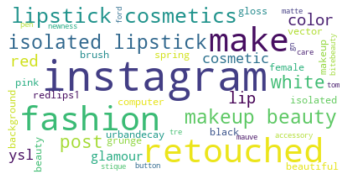

Cluster: 1


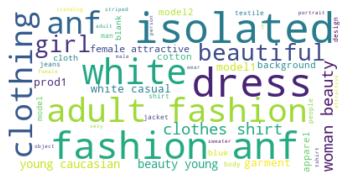

Cluster: 2


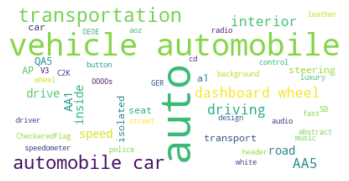

In [14]:
from wordcloud import WordCloud
result={'cluster':clusters,'tags':synopses}
result=pd.DataFrame(result)
for k in range(0, num_clusters):
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cluster_tags[k])
   print('Cluster: {}'.format(k))        
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

# Visualizing clusters

In [15]:
#set up colors per clusters using a dict
colors = {0: 'pink', 1: 'green', 2: 'red', 3: 'blue', 4: 'orange'}
cluster_names = {}
cluster_colors = {}

for i in range(0, num_clusters):
    cluster_names[i] = ",".join(cluster_top_tags[i])
    cluster_colors[i] = colors[i]


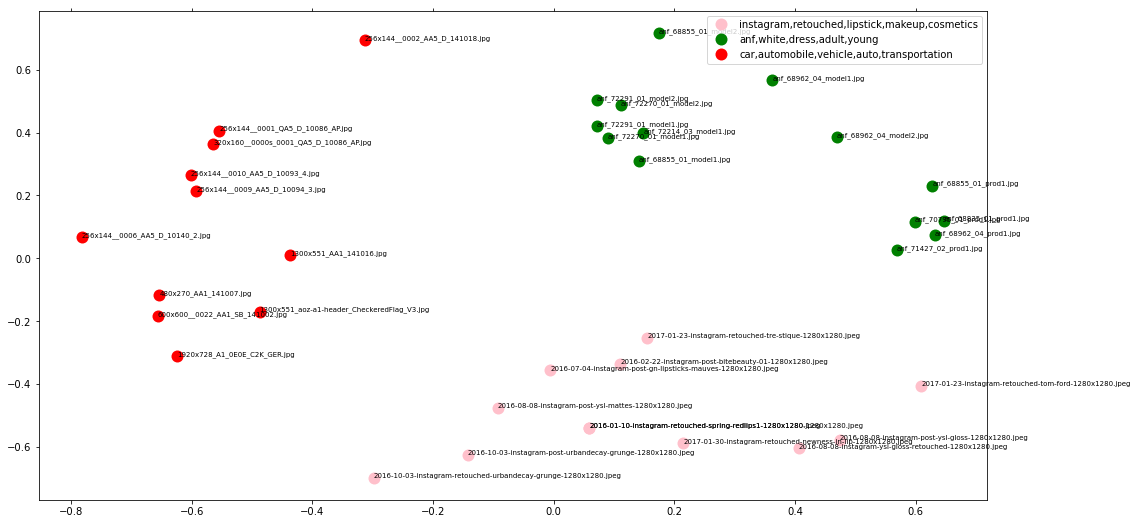

In [16]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=image_names)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=7)  

    
    
plt.show() #show the plot


In [17]:
frame.to_json(orient='records', lines=False)

'[{"name":"256x144__0002_AA5_D_141018.jpg","tags":"abstract background AA5","cluster":2},{"name":"1300x551_aoz-a1-header_CheckeredFlag_V3.jpg","tags":"auto isolated vehicle automobile car transport transportation police aoz a1 header CheckeredFlag V3","cluster":2},{"name":"1920x728_A1_0E0E_C2K_GER.jpg","tags":"auto speed vehicle automobile car road wheel transportation fast drive A1 0E0E C2K GER","cluster":2},{"name":"480x270_AA1_141007.jpg","tags":"auto vehicle automobile car road street transportation AA1","cluster":2},{"name":"600x600__0022_AA1_SB_141002.jpg","tags":"auto speed vehicle automobile car road transportation AA1 SB","cluster":2},{"name":"320x160__0000s_0001_QA5_D_10086_AP.jpg","tags":"auto inside interior vehicle automobile car dashboard wheel transportation seat driving 0000s QA5 AP","cluster":2},{"name":"256x144__0001_QA5_D_10086_AP.jpg","tags":"auto inside interior vehicle automobile car dashboard wheel leather seat driving QA5 AP","cluster":2},{"name":"256x144__0006_

# Hierarchical document clustering

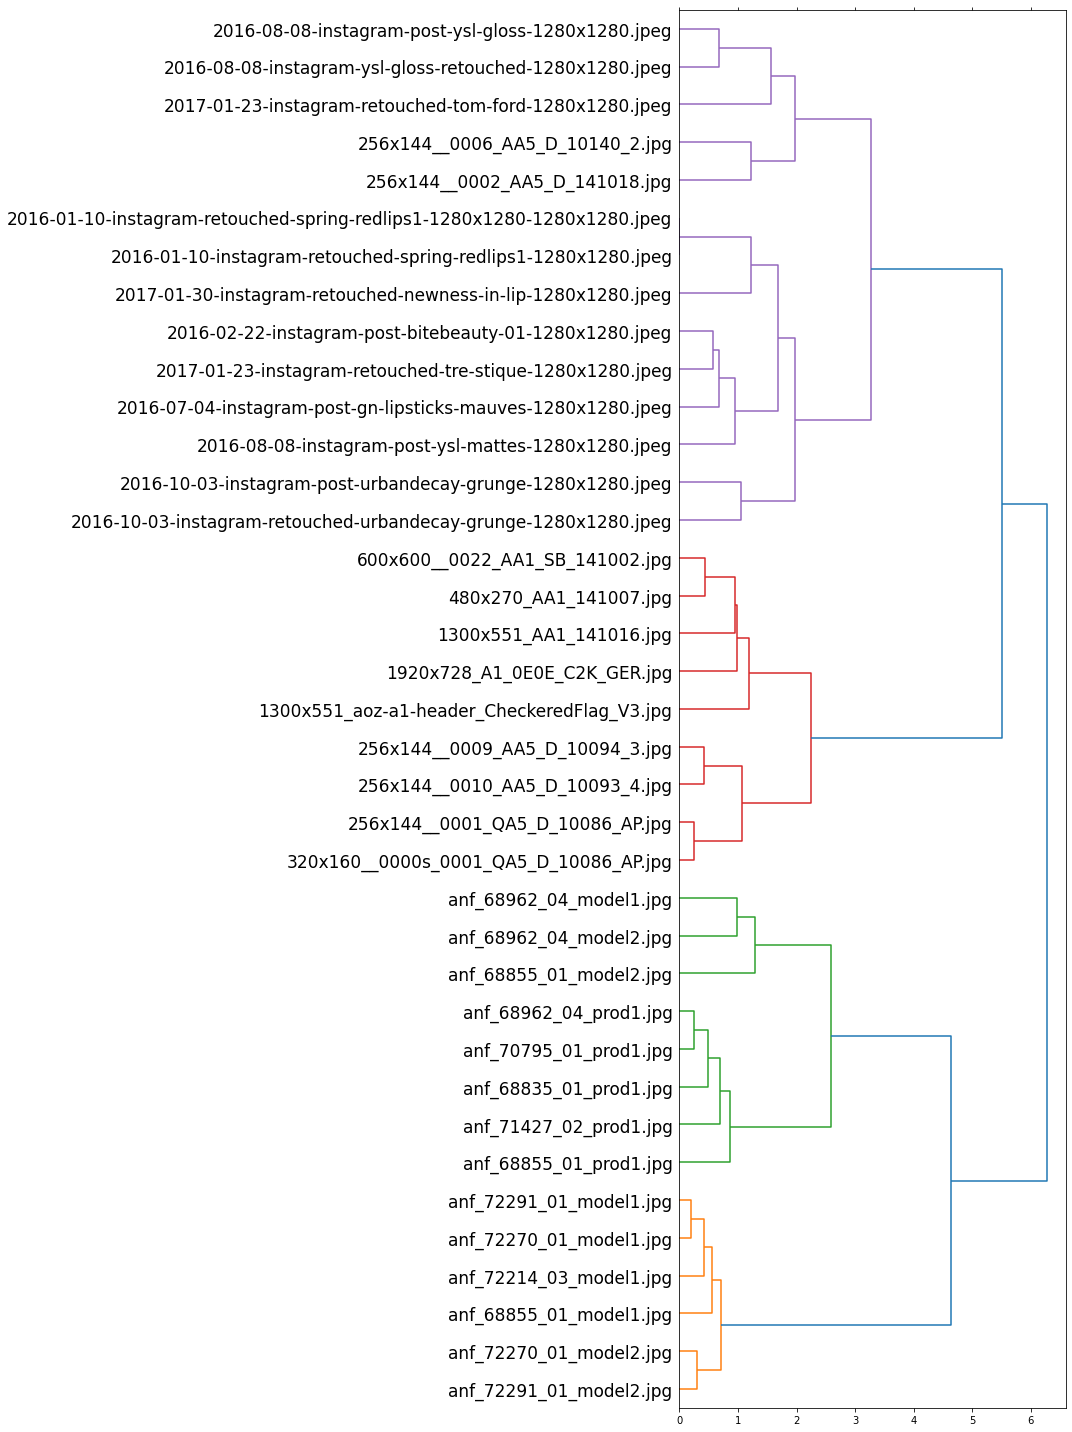

In [18]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=image_names, leaf_font_size=17);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

In [19]:
from sklearn.cluster import AgglomerativeClustering

data = tfidf_matrix.toarray()
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
from scipy.cluster.hierarchy import fcluster

fcluster(linkage_matrix,num_clusters,criterion='maxclust')


array([3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

array([[27.        , 36.        ,  0.        ,  2.        ],
       [21.        , 24.        ,  0.36779799,  2.        ],
       [16.        , 23.        ,  0.53966012,  2.        ],
       [15.        , 19.        ,  0.54539545,  2.        ],
       [ 5.        ,  6.        ,  0.54708232,  2.        ],
       [38.        , 40.        ,  0.57795414,  4.        ],
       [17.        , 42.        ,  0.63784837,  5.        ],
       [14.        , 39.        ,  0.66481098,  3.        ],
       [22.        , 43.        ,  0.67876138,  6.        ],
       [ 8.        ,  9.        ,  0.73478682,  2.        ],
       [ 3.        ,  4.        ,  0.77288645,  2.        ],
       [32.        , 34.        ,  0.81638957,  2.        ],
       [13.        , 44.        ,  0.82700124,  4.        ],
       [26.        , 33.        ,  0.83180586,  2.        ],
       [28.        , 48.        ,  0.84879167,  3.        ],
       [30.        , 31.        ,  0.84902447,  2.        ],
       [11.        , 49.

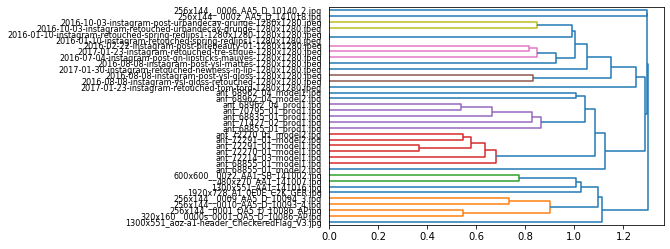

In [25]:
import pandas as pd 
import scipy.spatial
import scipy.cluster

clusters = scipy.cluster.hierarchy.linkage(tfidf_matrix.toarray(), method='single')
dendo  = scipy.cluster.hierarchy.dendrogram(clusters, labels = image_names, orientation = 'right')

clusters

In [26]:
# Create a nested dictionary from the ClusterNode's returned by SciPy
def add_node(node, parent ):
    # First create the new node and append it to its parent's children
    newNode = dict( node_id=node.id, children=[] )
    parent["children"].append( newNode )

    # Recursively add the current node's children
    if node.left: add_node( node.left, newNode )
    if node.right: add_node( node.right, newNode )
        
T = scipy.cluster.hierarchy.to_tree(clusters , rd=False)
d3Dendro = dict(children=[], name="Root1")
add_node( T, d3Dendro )


In [28]:
d3Dendro

{'children': [{'node_id': 72,
   'children': [{'node_id': 65,
     'children': [{'node_id': 1, 'children': []},
      {'node_id': 64,
       'children': [{'node_id': 54,
         'children': [{'node_id': 41,
           'children': [{'node_id': 5, 'children': []},
            {'node_id': 6, 'children': []}]},
          {'node_id': 46,
           'children': [{'node_id': 8, 'children': []},
            {'node_id': 9, 'children': []}]}]},
        {'node_id': 60,
         'children': [{'node_id': 2, 'children': []},
          {'node_id': 58,
           'children': [{'node_id': 10, 'children': []},
            {'node_id': 47,
             'children': [{'node_id': 3, 'children': []},
              {'node_id': 4, 'children': []}]}]}]}]}]},
    {'node_id': 71,
     'children': [{'node_id': 69,
       'children': [{'node_id': 66,
         'children': [{'node_id': 18, 'children': []},
          {'node_id': 63,
           'children': [{'node_id': 45,
             'children': [{'node_id': 22, 'chi